In [1]:
# !pip3 install opencv-contrib-python

In [3]:
import os
import cv2
import numpy 
import glob
import matplotlib.pyplot as plt
from skimage import io

In [12]:
# https://docs.opencv.org/3.4/d1/dc5/tutorial_background_subtraction.html

bgSub = cv2.createBackgroundSubtractorMOG2()
predicted = []

for file in sorted(os.listdir('data/baseline/pedestrians/input')):
    if file.endswith(".jpg") or file.endswith(".png"):
        frame = io.imread(os.path.join('data/baseline/pedestrians/input', file))
        gfbfMask = bgSub.apply(frame)
        predicted.append(gfbfMask)

In [23]:
gt = []
for file in sorted(os.listdir('data/baseline/pedestrians/groundtruth')):
    if file.endswith(".jpg") or file.endswith(".png"):
        frame = io.imread(os.path.join('data/baseline/pedestrians/groundtruth', file))
        gt.append(frame)


In [14]:
# https://towardsdatascience.com/intersection-over-union-iou-calculation-for-evaluating-an-image-segmentation-model-8b22e2e84686


def get_iou(predicted,gt):
    
    contours, hierarchy = cv2.findContours(predicted ,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours2, hierarchy2 = cv2.findContours(gt,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    
    stencil = numpy.zeros(predicted.shape).astype(predicted.dtype)
    color = [255, 255, 255]
    cv2.fillPoly(stencil, contours, color)
    
    
    result2 = cv2.bitwise_and(predicted, stencil)
    result1 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)


    stencil = numpy.zeros(gt.shape).astype(gt.dtype)
    color = [255, 255, 255]
    cv2.fillPoly(stencil, contours2, color)
    result2 = cv2.bitwise_and(gt, stencil)
    result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)

    intersection = numpy.logical_and(result1, result2)
    union = numpy.logical_or(result1, result2)
    iou_score = numpy.sum(intersection) / numpy.sum(union)
    
    return iou_score


In [15]:
average_iou = []
for pr, gt in zip(predicted, gt):
        average_iou.append(get_iou(pr, gt))

In [27]:
print("Average IOU :" , numpy.nanmean(numpy.array(average_iou)))
print("Max IOU :" , numpy.nanmax(average_iou))

Average IOU : 0.37271509087876575
Max IOU : 1.0


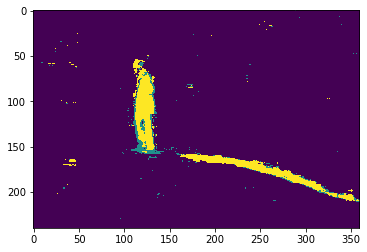

In [34]:
plt.imshow(predicted[654])

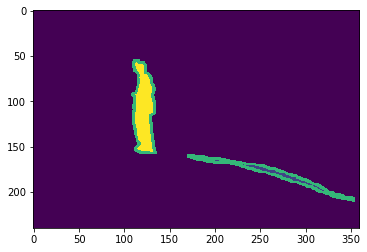

In [35]:
plt.imshow(gt[654])